<a href="https://colab.research.google.com/github/tallerzalan/DataCamp/blob/main/Certificate/Case_Study_Project_Travel_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study Project - Travel Insurance
---

## Context

Travel Assured is a travel insurance company.

Due to the COVID pandemic, they have had to cut their marketing budget by over 50%.

It is more important than ever that they advertise in the right places and to the right people.

Travel Assured has plenty of data on their current customers as well as people who got quotes but never bought insurance.

They want to know if there are differences in the travel habits between customers and non-customers - they believe they are more likely to travel often (buying tickets from frequent flyer miles) and travel abroad.

They would be interested in any other insights you can find that might help
the marketing strategy.

Your presentation should be no longer than ten minutes.

It should include no more than eight slides of content.

You will be presenting to the CEO.

## Content

*Age:* Age Of The Customer

*Employment Type:* The Sector In Which Customer Is Employed

*GraduateOrNot:* Whether The Customer Is College Graduate Or Not

*AnnualIncome:* The Yearly Income Of The Customer In Indian Rupees (Rounded To Nearest 50 Thousand Rupees)

*FamilyMembers:* Number Of Members In Customer's Family

*ChronicDisease:* Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama, etc.

*FrequentFlyer:* Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).

*EverTravelledAbroad:* Has The Customer Ever Travelled To A Foreign Country (Not Necessarily Using The Company's Services)

*TravelInsurance:* Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import levene
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

## Importing the Dataset

In [ ]:
# Importing the dataset
dataset_df = pd.read_csv("/content/travel_insurance.csv")
dataset_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## Data Cleaning

In [ ]:
# Dropping index 'Unnamed'
dataset = dataset_df.loc[:, ~dataset_df.columns.str.contains("^Unnamed")]
dataset.describe().columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')

## Exploratory Data Analysis

In [ ]:
le = LabelEncoder()
to_encode = ["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]

for index in to_encode:
    dataset[index] = le.fit_transform(dataset[index])

dataset["AnnualIncome"] = np.log10(dataset["AnnualIncome"])

### Correlation, Homogenity, Normality

In [ ]:
corrPearson = dataset.corr(method = "pearson")

corrSpearman = dataset.corr(method = "spearman")

#### Pearson Correlation

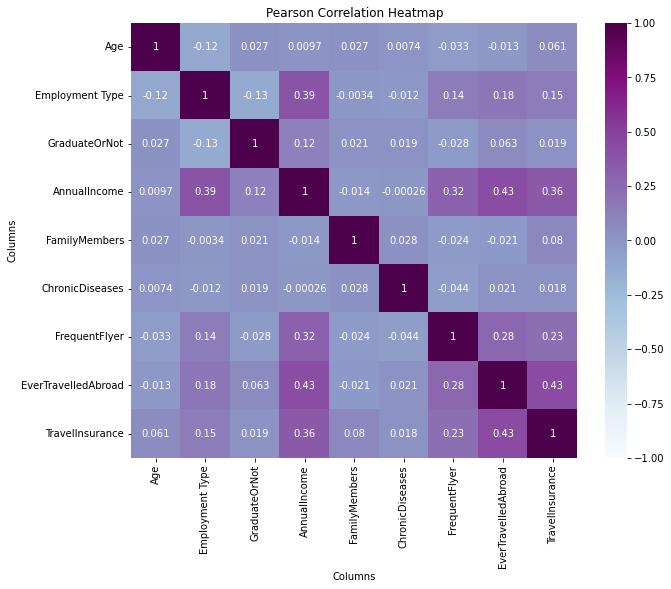

In [ ]:
figure = plt.figure(figsize = (10, 8))
sns.heatmap(corrPearson, annot = True, cmap = "BuPu", vmin = -1, vmax = +1)
plt.title("Pearson Correlation Heatmap")
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.show()

#### Spear Correlation

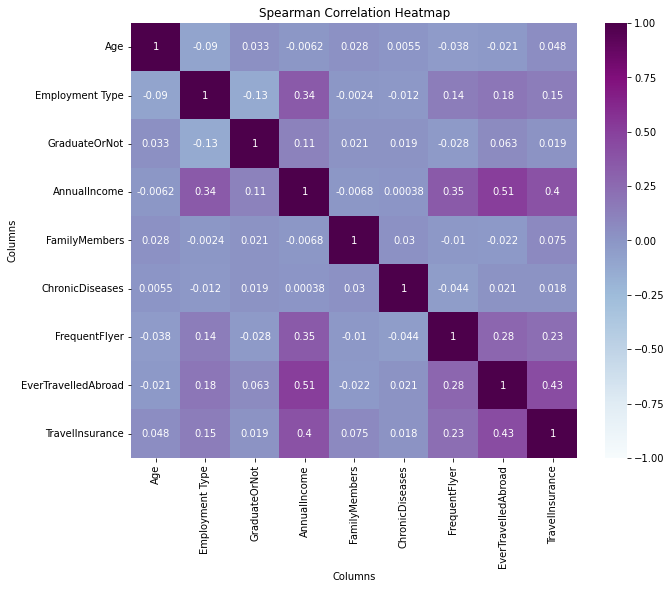

In [ ]:
figure = plt.figure(figsize=(10, 8))
sns.heatmap(corrSpearman, annot = True, cmap = "BuPu", vmin = -1, vmax = +1)
plt.title("Spearman Correlation Heatmap")
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.show()

#### Homogeneity

In [ ]:
print("%0.4f - %0.4f " % levene(dataset["Age"],
                              dataset["Employment Type"],
                              dataset["GraduateOrNot"],
                              dataset["AnnualIncome"],
                              dataset["FamilyMembers"],
                              dataset["ChronicDiseases"],
                              dataset["FrequentFlyer"],
                              dataset["EverTravelledAbroad"],
                              dataset["TravelInsurance"]))

2233.1352 - 0.0000 


#### Normality

In [ ]:
for i in dataset.columns:
    print("-----" * 10)
    print("%0.3f - %0.3f" % shapiro(dataset[i]), i)

--------------------------------------------------
0.927 - 0.000 Age
--------------------------------------------------
0.567 - 0.000 Employment Type
--------------------------------------------------
0.424 - 0.000 GraduateOrNot
--------------------------------------------------
0.939 - 0.000 AnnualIncome
--------------------------------------------------
0.938 - 0.000 FamilyMembers
--------------------------------------------------
0.560 - 0.000 ChronicDiseases
--------------------------------------------------
0.500 - 0.000 FrequentFlyer
--------------------------------------------------
0.480 - 0.000 EverTravelledAbroad
--------------------------------------------------
0.606 - 0.000 TravelInsurance


### Visual Analysis

#### Histograms

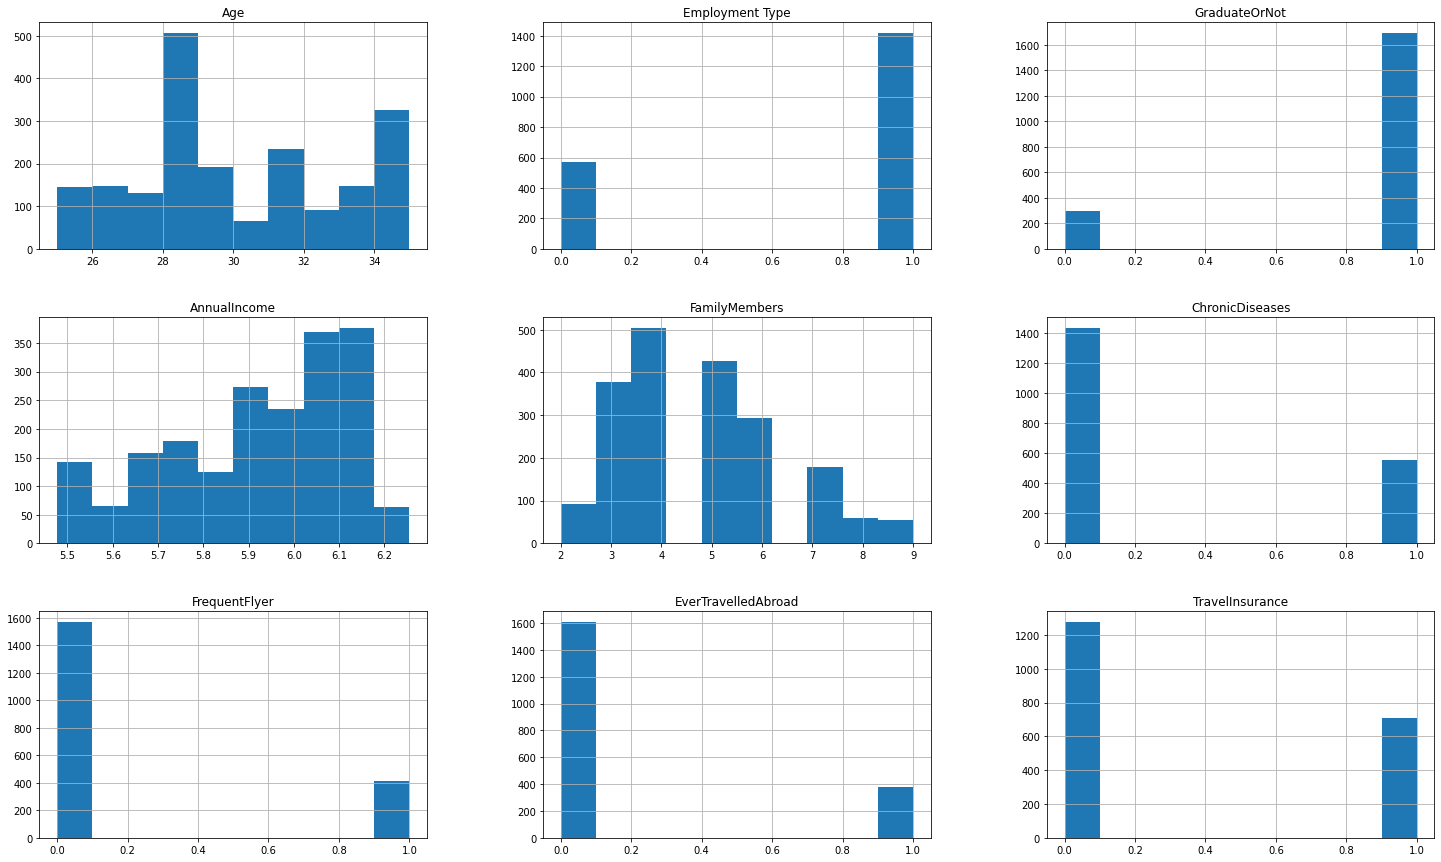

In [ ]:
dataset.hist(figsize = (25, 15))
plt.show()

#### Bar Plots

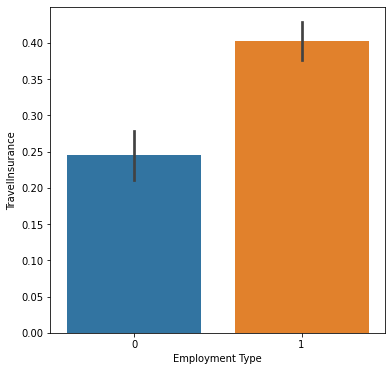

In [ ]:
figure = plt.figure(figsize = (6, 6))
sns.barplot(x = "Employment Type", y = "TravelInsurance", data = dataset)
plt.show()

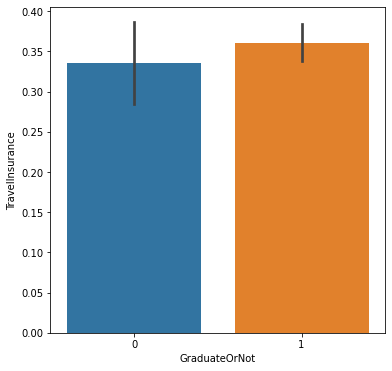

In [ ]:
figure = plt.figure(figsize = (6, 6))
sns.barplot(x = "GraduateOrNot", y = "TravelInsurance", data = dataset)
plt.show()

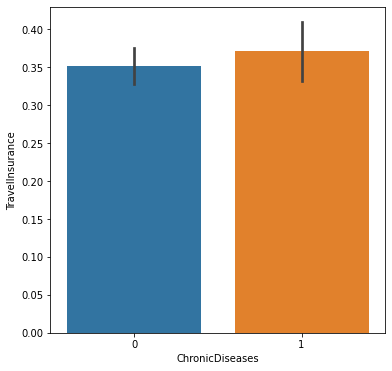

In [ ]:
figure = plt.figure(figsize = (6, 6))
sns.barplot(x = "ChronicDiseases", y = "TravelInsurance", data = dataset)
plt.show()

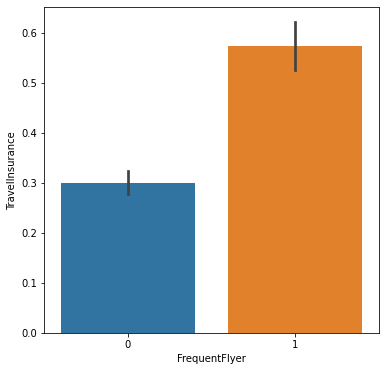

In [ ]:
figure = plt.figure(figsize = (6, 6))
sns.barplot(x = "FrequentFlyer", y = "TravelInsurance", data = dataset)
plt.show()

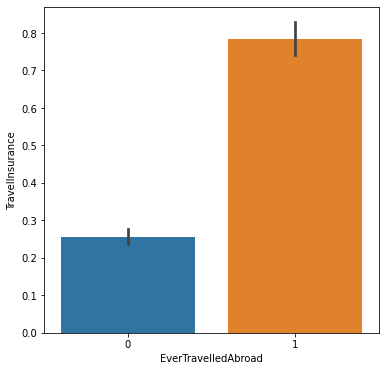

In [ ]:
figure = plt.figure(figsize = (6, 6))
sns.barplot(x = "EverTravelledAbroad", y = "TravelInsurance", data = dataset)
plt.show()

#### Box Plots

In [ ]:
datasetV = dataset.copy()
datasetV["Employment Type"] = pd.Categorical(datasetV["Employment Type"])
datasetV["GraduateOrNot"] = pd.Categorical(datasetV["GraduateOrNot"])
datasetV["FrequentFlyer"] = pd.Categorical(datasetV["FrequentFlyer"])
datasetV["EverTravelledAbroad"] = pd.Categorical(datasetV["EverTravelledAbroad"])
datasetV["TravelInsurance"] = pd.Categorical(datasetV["TravelInsurance"])

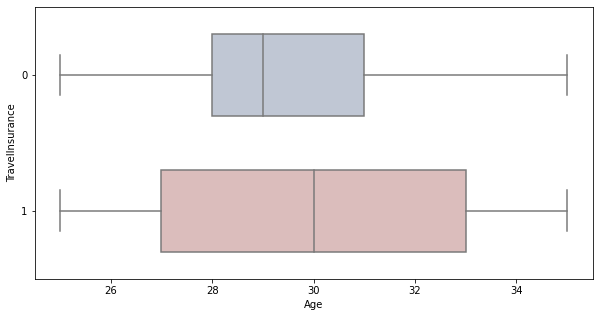

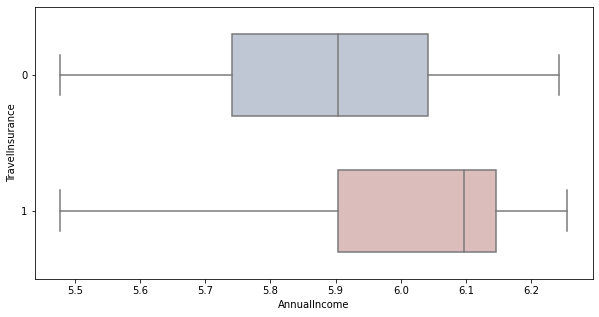

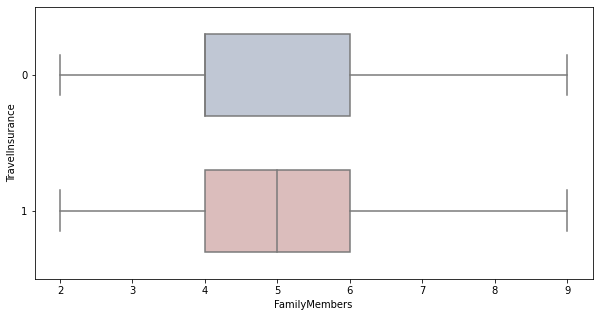

In [ ]:
to_boxplot = ["Age", "AnnualIncome", "FamilyMembers"]
for index in to_boxplot:
    figure = plt.figure(figsize = (10, 5))
    sns.boxplot(x = index, y = "TravelInsurance", data = datasetV, whis = [0, 100], width = 0.6, palette = "vlag")
plt.show()

#### Line Plots

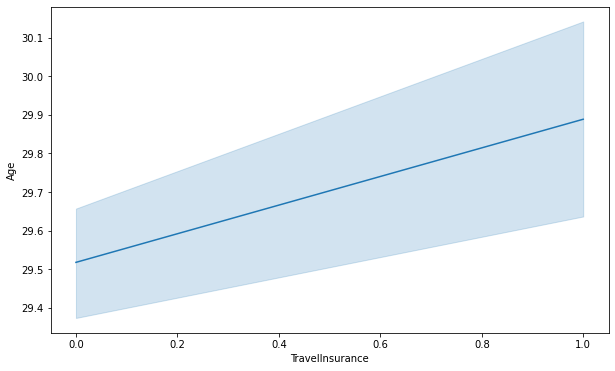

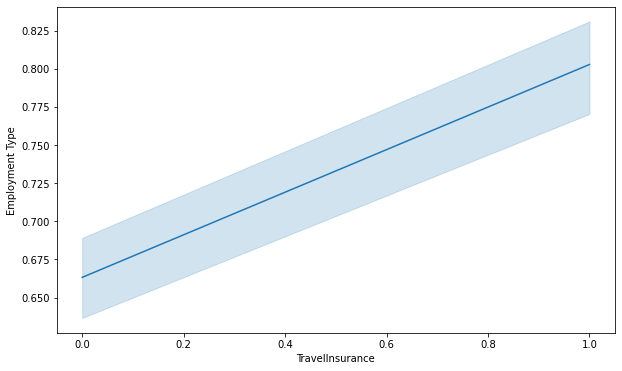

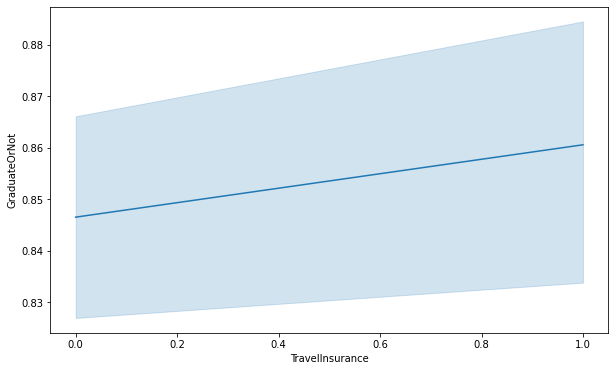

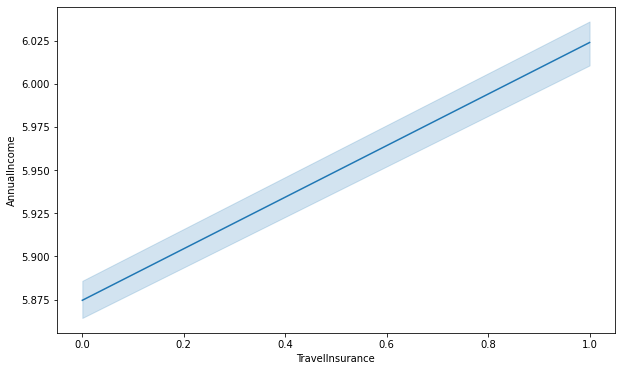

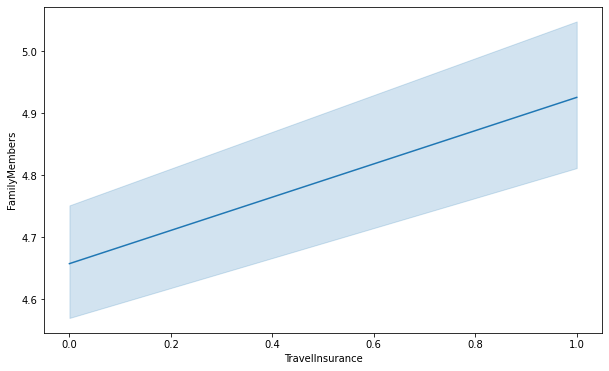

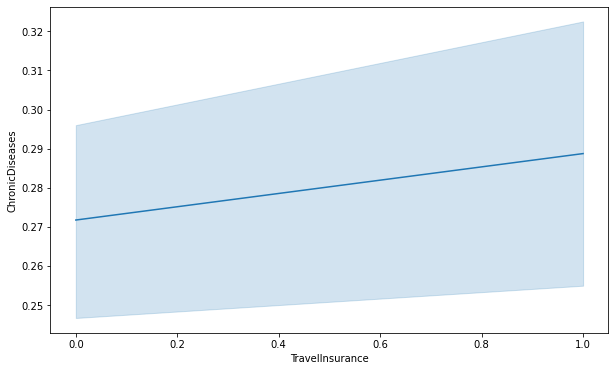

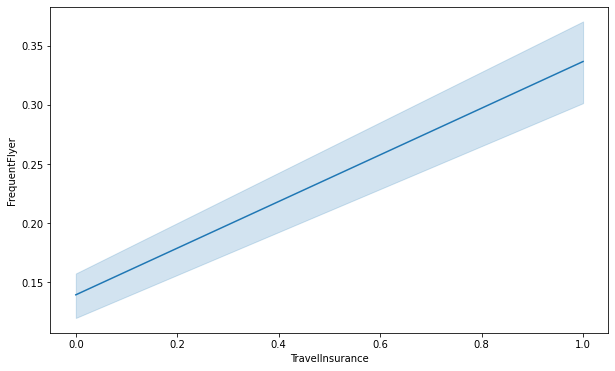

In [ ]:
rand = 0
for index in dataset.columns:
    rand = rand + 1
    if rand < 8: # Total of 14 columns but we don't need the output columns
        figure = plt.figure(figsize = (10, 6))
        sns.lineplot(x = "TravelInsurance", y = index, data = dataset)
        plt.show()
    else:
        break

## Modelling

### Splitting X and y for Modelling

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


### Prediction

In [ ]:
cKNN = KNeighborsClassifier(n_neighbors = 10, metric = "minkowski", p = 2).fit(X_train, y_train)

cDT = DecisionTreeClassifier(criterion = "entropy", random_state = 0).fit(X_train, y_train)

cRF = RandomForestClassifier(n_estimators = 10, criterion ="entropy", random_state = 0).fit(X_train, y_train)

cNB = GaussianNB().fit(X_train, y_train)

cLoR = LogisticRegression(solver = "liblinear", random_state = 0).fit(X_train, y_train)

cSVM = SVC(kernel = "rbf", random_state=0).fit(X_train, y_train)

### Model Comparison

In [ ]:
model_lst = [cKNN, cDT, cRF, cLoR, cNB, cSVM]

for model in model_lst:
    model_name = model.__class__.__name__
    predict = model.predict(X_test)
    R2CV = cross_val_score(model, X_test, y_test, cv = 10, verbose = False).mean()
    error = -cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error", verbose = False).mean()
    print(model_name + ":")
    print("*" * 20)
    print(accuracy_score(y_test, predict))
    print(R2CV)
    print(np.sqrt(error))
    print('*' * 25)

KNeighborsClassifier:
********************
0.8169014084507042
0.7708979591836735
0.4786460496194725
*************************
DecisionTreeClassifier:
********************
0.7746478873239436
0.7628163265306122
0.48701506493063207
*************************
RandomForestClassifier:
********************
0.8048289738430584
0.792734693877551
0.45526399607529805
*************************
LogisticRegression:
********************
0.7364185110663984
0.7382448979591836
0.5116200758774193
*************************
GaussianNB:
********************
0.7243460764587525
0.7242857142857143
0.5250850271282601
*************************
SVC:
********************
0.6458752515090543
0.6459183673469387
0.5950475885616723
*************************


### Model Improvement

#### Feature Scaling

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Feature Extraction

##### Principal Component Analysis

In [ ]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

###### Fitting the PCA Improved Model

In [ ]:
cKNN_pca = KNeighborsClassifier(n_neighbors = 10, metric = "minkowski", p = 2).fit(X_train_pca, y_train)

cDT_pca = DecisionTreeClassifier(criterion = "entropy", random_state = 0).fit(X_train_pca, y_train)

cRF_pca = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0).fit(X_train_pca, y_train)

cNB_pca = GaussianNB().fit(X_train_pca, y_train)

cLoR_pca = LogisticRegression(solver = "liblinear", random_state = 0).fit(X_train_pca, y_train)

cSVM_pca = SVC(kernel = "rbf", random_state=0).fit(X_train_pca, y_train)

###### Model Comparison with Extracted Features

In [ ]:
model_lst_pca = [cKNN_pca, cDT_pca, cRF_pca, cLoR_pca, cNB_pca, cSVM_pca]

for model in model_lst_pca:
    model_name = model.__class__.__name__
    predict = model.predict(X_test_pca)
    R2CV = cross_val_score(model, X_test_pca, y_test, cv = 10, verbose = False).mean()
    error = -cross_val_score(model, X_test_pca, y_test, cv = 10, scoring = "neg_mean_squared_error", verbose = False).mean()
    print(model_name + ":")
    print("*" * 20)
    print(accuracy_score(y_test, predict))
    print(R2CV)
    print(np.sqrt(error))
    print('*' * 25)

KNeighborsClassifier:
********************
0.778672032193159
0.750530612244898
0.49946910590656357
*************************
DecisionTreeClassifier:
********************
0.744466800804829
0.730530612244898
0.5191044093003854
*************************
RandomForestClassifier:
********************
0.7625754527162978
0.7666938775510205
0.4830177247772379
*************************
LogisticRegression:
********************
0.7223340040241448
0.7383265306122448
0.5115402910697798
*************************
GaussianNB:
********************
0.7424547283702213
0.7464897959183674
0.5034979682994091
*************************
SVC:
********************
0.7645875251509054
0.7605714285714286
0.48931438914931924
*************************


##### PCA with Kernel

In [ ]:
kpca = KernelPCA(n_components = 3, kernel = "rbf") # Radial Basis Function
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

###### Fitting the Improved Model

In [ ]:
cKNN_kpca = KNeighborsClassifier(n_neighbors = 10, metric = "minkowski", p = 2).fit(X_train_kpca, y_train)

cDT_kpca = DecisionTreeClassifier(criterion = "entropy", random_state = 0).fit(X_train_kpca, y_train)

cRF_kpca = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0).fit(X_train_kpca, y_train)

cNB_kpca = GaussianNB().fit(X_train_kpca, y_train)

cLoR_kpca = LogisticRegression(solver = "liblinear", random_state = 0).fit(X_train_kpca, y_train)

cSVM_kpca = SVC(kernel = "rbf", random_state = 0).fit(X_train_kpca, y_train)

###### Comparing Models for the 3rd Time

In [ ]:
model_lst_kpca = [cKNN_kpca, cDT_kpca, cRF_kpca, cLoR_kpca, cNB_kpca, cSVM_kpca]

for model in model_lst_kpca:
    model_name = model.__class__.__name__
    predict = model.predict(X_test_kpca)
    R2CV = cross_val_score(model, X_test_kpca, y_test, cv = 10, verbose = False).mean()
    error = -cross_val_score(model, X_test_kpca, y_test, cv = 10, scoring = "neg_mean_squared_error", verbose = False).mean()
    print(model_name + ":")
    print("*" * 20)
    print(accuracy_score(y_test, predict))
    print(R2CV)
    print(np.sqrt(error))
    print('*' * 25)

KNeighborsClassifier:
********************
0.7665995975855131
0.7563673469387756
0.49359158528202696
*************************
DecisionTreeClassifier:
********************
0.744466800804829
0.7486938775510203
0.5013044209350039
*************************
RandomForestClassifier:
********************
0.7686116700201208
0.736530612244898
0.5132926920920481
*************************
LogisticRegression:
********************
0.7344064386317908
0.7484081632653061
0.5015893108257929
*************************
GaussianNB:
********************
0.7263581488933601
0.7242857142857143
0.5250850271282601
*************************
SVC:
********************
0.7665995975855131
0.7523673469387755
0.4976270220368107
*************************


## Conclusion

### Best Score

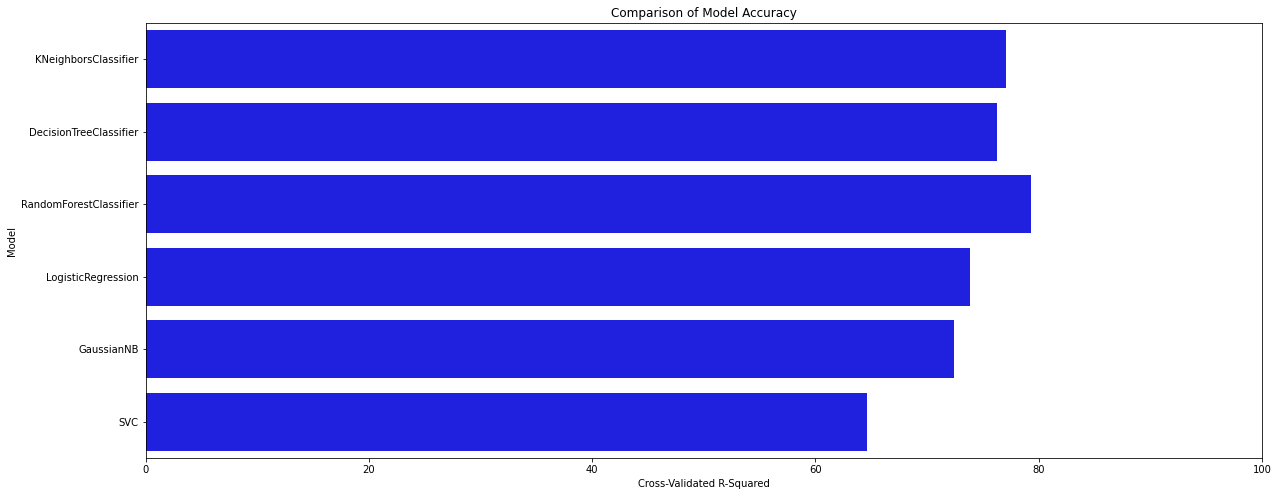

In [ ]:
r = pd.DataFrame(columns=["MODELS", "R2CV"])

for model in model_lst:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_test, y_test, cv = 10, verbose = False).mean()
    result = pd.DataFrame([[name, R2CV * 100]], columns = ["MODELS", "R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize = (20, 8))
sns.barplot(x = "R2CV", y = "MODELS", data = r, color = "Blue")
plt.xlabel("Cross-Validated R-Squared")
plt.ylabel("Model")
plt.xlim(0, 100)
plt.title("Comparison of Model Accuracy")
plt.show()